<a href="https://colab.research.google.com/github/Adrianopogianeli/deep_learning_with_pyhon_sencond_edition/blob/master/chapter_2_data_representations_for_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#2.2.1 Scalars: (rank-0 tensors)
import numpy as np
x = np.array(12)
x


array(12)

In [3]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 0
number of dimension: ()


In [4]:
#2.2.2 Vectors: (rank-1 tensors)
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [5]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 1
number of dimension: (5,)


In [6]:
#2.2.3 Matrices (rank-2 tensors) it is 2 axes: rows and lines
x = np.array([[5,23,22,1,5],
             [6,34,1,7,89],
             [7,23,43,76,32]])
x

array([[ 5, 23, 22,  1,  5],
       [ 6, 34,  1,  7, 89],
       [ 7, 23, 43, 76, 32]])

In [7]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 2
number of dimension: (3, 5)


In [8]:
#2.2.4 Rank-3 and higher-rank tensors = it is a matrices's pack, it is 3 axes because is has 3 matrices
x = np.array([
    [[5,23,22,1,5],
      [6,34,1,7,89],
      [7,23,43,76,32]],
          [[5,23,22,1,5],
          [6,34,1,7,89],
          [7,23,43,76,32]],
             [[5,23,22,1,5],
             [6,34,1,7,89],
             [7,23,43,76,32]]
             ]
             )

In [9]:
x.ndim
print('number of axes: %s'%x.ndim)
print('number of dimension: %s'%str(x.shape))

number of axes: 3
number of dimension: (3, 3, 5)


In [10]:
#2.2.5 Key attributes
from tensorflow.keras.datasets import mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
#it is 3 axes because it has more than 2 matrices (rank2)
train_images.ndim

3

In [12]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images.dtype

dtype('uint8')

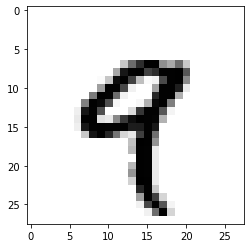

In [48]:
# Listing 2.8 Dispaly the fourth digit of the tensor rank3
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [29]:
## print all digits of the dataset
import time
#for item in range(len(train_images)):
  #plt.imshow(train_images[item], cmap=plt.cm.binary)
  #plt.show()
  #time.sleep(2)

In [34]:
train_labels[4]

9

In [35]:
#2.2.6 Manipulation tensors in Numpy
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, :,:]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [39]:
#select 14x14 pixes on bottom-rigth
my_slice = train_images[:,0:14,0:14]
my_slice.shape

(60000, 14, 14)

In [41]:
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

In [44]:
#2.2.7 The notion of data batches
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [45]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [46]:
n =3
batch = train_images[128 * n: 128 * (n+1)]
batch.shape

(128, 28, 28)

In [49]:
#2.3 Tensor operators
#keras.layers.Dense(512)
#output = relu(dot(input, w)+ b)

In [85]:
#2.3.1 element-wise operations
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy() #avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j],0)
  return x

In [86]:
naive_test1 = np.array([[12,13,23],[1,2,3],[2,3,4],[3,4,5]])
naive_test2 = np.array([[12,13,23],[1,2,3],[2,3,4],[3,4,6]])
#naive_test.shape
naive_relu(naive_test1)


array([[12, 13, 23],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5]])

In [87]:
#2.3.1 element-wise operations for addition
def naive_relu(x, y): # x and y are rank-2 numpy tensors
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy() #avoid overwriting the input tensor
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] =+ y[i,j]
  return x

In [88]:
naive_relu(naive_test1,naive_test2)

array([[12, 13, 23],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  6]])